<a href="https://colab.research.google.com/github/annakysilova/Data-Fr/blob/main/Kysilova_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка среды

In [3]:
# Определение рабочей папки
%cd "/content/drive/MyDrive/Data Science"

/content/drive/MyDrive/Data Science


# Pandas начало

In [ ]:
#установка пандас
!pip install pandas

In [6]:
import pandas as pd
#серия - одномерный массив 
my_series = pd.Series([6, 3, 2, 1, 7, 11, 15, 4]) 

In [ ]:
my_series

In [8]:
 #Получить информацию об индексах
 my_series.index

RangeIndex(start=0, stop=8, step=1)

In [ ]:
dir(my_series)

In [10]:
#Получить только значения
my_series.values

array([ 6,  3,  2,  1,  7, 11, 15,  4])

In [ ]:
#Получить только значение для 5-ого элемента (нумерация с 0)
my_series[4]

In [22]:
#Использование индексов
my_series2 = pd.Series([6,  3,  2,  1,  7, 11, 15,  4], index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'k']) 
my_series2[['a', 'b', 'g']]

a     6
b     3
g    15
dtype: int64

In [23]:
#Просмотр 1-ого элемента
my_series2[3]

1

In [24]:
#Просмотр элемента по индексу "k"
my_series2['k']

4

In [26]:
#Просмотр элементов, где значения больше 9 
my_series2[my_series2 > 9]

f    11
g    15
dtype: int64

In [101]:
my_series2[my_series2 > 0] * 2

a    12
b     6
c     4
d     2
e    14
f    22
g    30
k     8
dtype: int64

In [ ]:
my_series3 = pd.Series({'a': 5, 'b': 6, 'c': 7, 'd': 8})
my_series3

In [102]:
my_series3 = pd.Series([5,  6,  7,  8], index = ['A', 'B', 'C', 'D'])
my_series3

A    5
B    6
C    7
D    8
dtype: int64

In [100]:
my_series3.name = 'numbers'
my_series3.index.name = 'letters'
my_series3

letters
A    6
B    3
C    2
D    1
Name: numbers, dtype: int64

# Frame

In [29]:
#Объявление фреймов
df = pd.DataFrame({'country': ['Belgium', 'France', 'Belarus', 'Ukraine'], 'population': [17.04, 68.5, 39.5, 33.5],'square': [2724902, 17125191, 207600, 603628]})

In [30]:
df

,country,population,square
0,Belgium,17.04,2724902
1,France,68.50,17125191
2,Belarus,39.50,207600
3,Ukraine,33.50,603628


In [31]:
#Просмотр фрейма по одному полю
df['country']

0    Belgium
1     France
2    Belarus
3    Ukraine
Name: country, dtype: object

In [32]:
#Просмотр фрейма по одному полю (другой способ)
df.country

0    Belgium
1     France
2    Belarus
3    Ukraine
Name: country, dtype: object

In [37]:
#Просмотр 4-ой записи фрейма
df.loc[3]

country       Ukraine
population       33.5
square         603628
Name: 3, dtype: object

In [38]:
#Добавил новую запись для индекса 4  
df.loc[4] = ['Ukraine', 40.98, 603628]

In [39]:
#Указанные поля для всего диапазона данных
df.loc[:,['population', 'square']]

,population,square
0,17.04,2724902
1,68.50,17125191
2,39.50,207600
3,33.50,603628
4,40.98,603628


In [40]:
#Группировка по полю 'country' по количеству
df.groupby(['country']).count()

,population,square
country,,
Belarus,1,1
Belgium,1,1
France,1,1
Ukraine,2,2


In [138]:
df.index = ['BE', 'FR', 'BY', 'UA']
df.index.name = 'Country Code'

In [ ]:
df

In [135]:
df['country']


Country Code
(Belgium,)    Belgium
(France,)      France
(Belarus,)    Belarus
(Ukraine,)    Ukraine
Name: country, dtype: object

In [129]:
df.iloc[0]

country       Belgium
population      17.04
square        2724902
Name: (BE,), dtype: object

In [139]:
df.loc[['BE', 'FR'], 'population']

Country Code
BE     17.04
FR    143.50
Name: population, dtype: float64

In [140]:
df.loc['BE':'BY']

,country,population,square
Country Code,,,
BE,Belgium,17.04,2724902
FR,France,143.50,17125191
BY,Belarus,9.50,207600


In [141]:
df[df.population > 10][['country', 'square']]

,country,square
Country Code,,
BE,Belgium,2724902
FR,France,17125191
UA,Ukraine,603628


In [142]:
df.reset_index()

,Country Code,country,population,square
0,BE,Belgium,17.04,2724902
1,FR,France,143.50,17125191
2,BY,Belarus,9.50,207600
3,UA,Ukraine,45.50,603628


In [145]:
df['density'] = df['population'] / df['square'] * 1000000
df

,country,population,square,density
Country Code,,,,
BE,Belgium,17.04,2724902,6.253436
FR,France,143.50,17125191,8.379469
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


In [146]:
df.drop(['density'], axis='columns')

,country,population,square
Country Code,,,
BE,Belgium,17.04,2724902
FR,France,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [147]:
df = df.rename(columns={'Country Code': 'country_code'})
df

,country,population,square,density
Country Code,,,,
BE,Belgium,17.04,2724902,6.253436
FR,France,143.50,17125191,8.379469
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


In [148]:
df.to_csv('frame.csv')

In [150]:
df = pd.read_csv('frame.csv', sep=',')

# Titanic

In [107]:
#Загрузка данных в фрейм из файла (путь к нему указали выше)
titanic_df = pd.read_csv('train (3) (2).csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [151]:
print(titanic_df.groupby(['Sex', 'Survived'])['PassengerId'].count())

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64


In [152]:
print(titanic_df.groupby(['Pclass', 'Survived'])['PassengerId'].count())

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64


In [176]:
import matplotlib.pyplot as plt
>>> titanic_df = df.loc[:, ['Sex', 'Age']]
>>> titanic_df.plot()
>>> plt.show()

KeyError: ignored

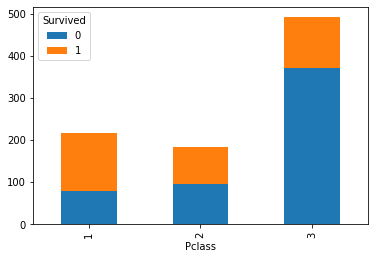

In [108]:
#Cколько пассажиров в каждом классе в виде гистограмы
titanic_df.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar',
stacked=True)

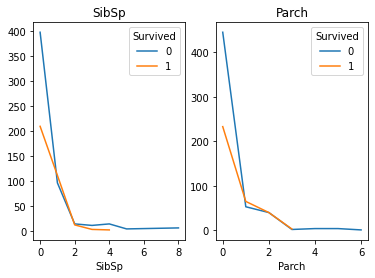

In [109]:
#Как количество родственников влияет на факт спасения:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2)
titanic_df.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0],
title='SibSp')
titanic_df.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1],
title='Parch')

In [111]:
#Вывести статистику по детях
titanic_df[titanic_df.Age < 18].count()

PassengerId    113
Survived       113
Pclass         113
Name           113
Sex            113
Age            113
SibSp          113
Parch          113
Ticket         113
Fare           113
Cabin           19
Embarked       113
dtype: int64

In [48]:
#У скольки пассажиров заполнены данные о каютах
titanic_df.PassengerId[titanic_df.Cabin.notnull()].count()

204

In [49]:
#У скольки человек заполнено поле "возраст"
titanic_df.PassengerId[titanic_df.Age.notnull()].count()

714

In [51]:
#Заполняем поля возраста
titanic_df.Age = titanic_df.Age.median()

In [52]:
#Пассажиры, у которых порт не указан
[titanic_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,28.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,28.0,0,0,113572,80.0,B28,NaN


In [56]:
#Присваиваем порт пассажирам
MaxPassEmbarked = titanic_df.groupby('Embarked').count()['PassengerId']
titanic_df.Embarked[titanic_df.Embarked.isnull()] = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
#Определить пассажиров мужского пола из первого класса
titanic_df[titanic_df.Sex == 'male'][titanic_df.Pclass == 1].count()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Survived    122
Pclass      122
Sex         122
Age         122
SibSp       122
Parch       122
Fare        122
Embarked    122
dtype: int64

KeyError: ignored

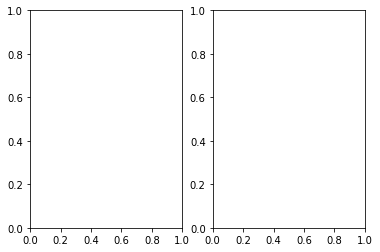

In [57]:
#Удаление записи
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)